# Air Passengers

#### Data source: https://www.kaggle.com/datasets/rakannimer/air-passengers

## Content
### 01. Importing libraries and data
### 02. Data Wrangling
### 03. Decomposing Time-Series Data
### 04. Stationarity Test (Dickey-Fuller Test)
### 05. Stationarizing the data

## 01. Importing libraries and data

In [5]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

In [6]:
# Disabling deprecation warnings that could indicate, for instance, a suspended library or feature; not task-relevant
warnings.filterwarnings("ignore") 

In [7]:
# Choosing styling option for how plots will appear
plt.style.use('fivethirtyeight')

In [8]:
# Create Path
path="C:/Users/Oksana Stepanova/OneDrive/Документи/New Project/02 Data/Original Data/"

In [9]:
# Import data
df=pd.read_csv(os.path.join(path, 'AirPassengers.csv'))

In [11]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
df.shape

(144, 2)

In [13]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
# Convert the column to datetime
df['Month'] = pd.to_datetime(df['Month'])

In [17]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [19]:
# Set datetime column(Month) as the data frame index
df = df.set_index('Month')

In [20]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


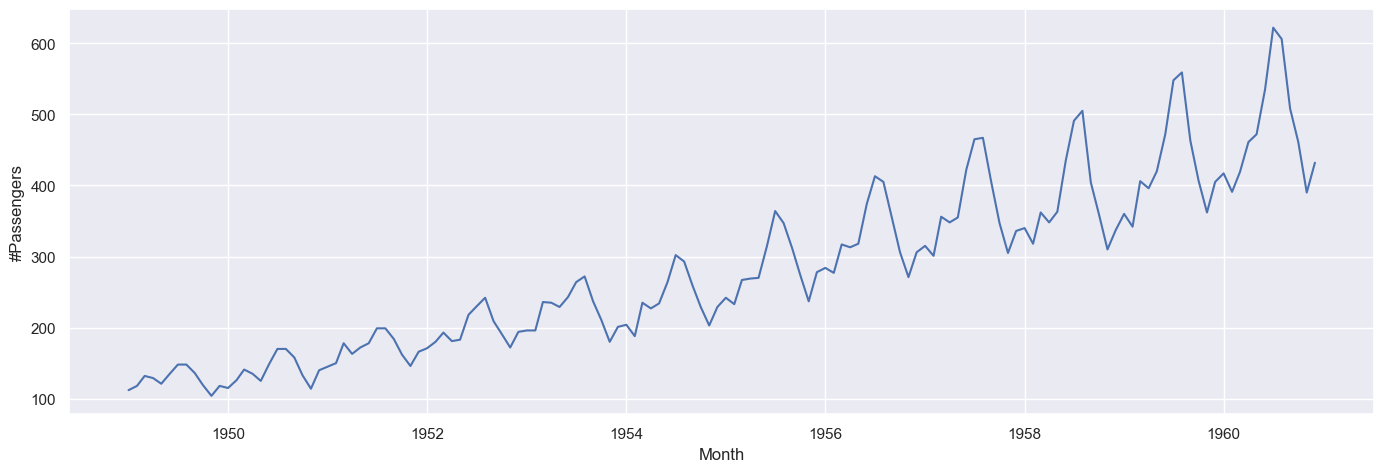

In [21]:
# Plot data
sns.set(rc={'figure.figsize':(15, 5)}) #make sure seaborn is imported 
sns.lineplot( x ='Month', y ='#Passengers', data = df) 
plt.show()

## 02. Data Wrangling

In [27]:
# Reset index so that you can use the "Date" column as a filter
df = df.reset_index()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [29]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [30]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [31]:
# Rename columns
df.rename(columns={'Month': 'date', '#Passengers': 'number_passengers'})

,date,number_passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [32]:
# Check for missing values (you shouldn't have any)
df.isnull().sum() 

Month          0
#Passengers    0
dtype: int64

In [33]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

# No dups!

0

In [39]:
df=df.rename(columns={'Month': 'date', '#Passengers': 'number_passengers'})

In [40]:
df.head()

,index,date,number_passengers
0,0,1949-01-01,112
1,1,1949-02-01,118
2,2,1949-03-01,132
3,3,1949-04-01,129
4,4,1949-05-01,121


In [41]:
df.drop(columns=['index'])

,date,number_passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [43]:
# Set the "Date" column as the index

from datetime import datetime

df['datetime'] = pd.to_datetime(df['date']) # Create a datetime column from "Date.""
df = df.set_index('datetime') # Set the datetime as the index of the dataframe.
df.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df.head()

,index,number_passengers
datetime,,
1949-01-01,0,112
1949-02-01,1,118
1949-03-01,2,132
1949-04-01,3,129
1949-05-01,4,121


In [44]:
df=df.drop(columns=['index'])

In [45]:
df.head()

,number_passengers
datetime,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


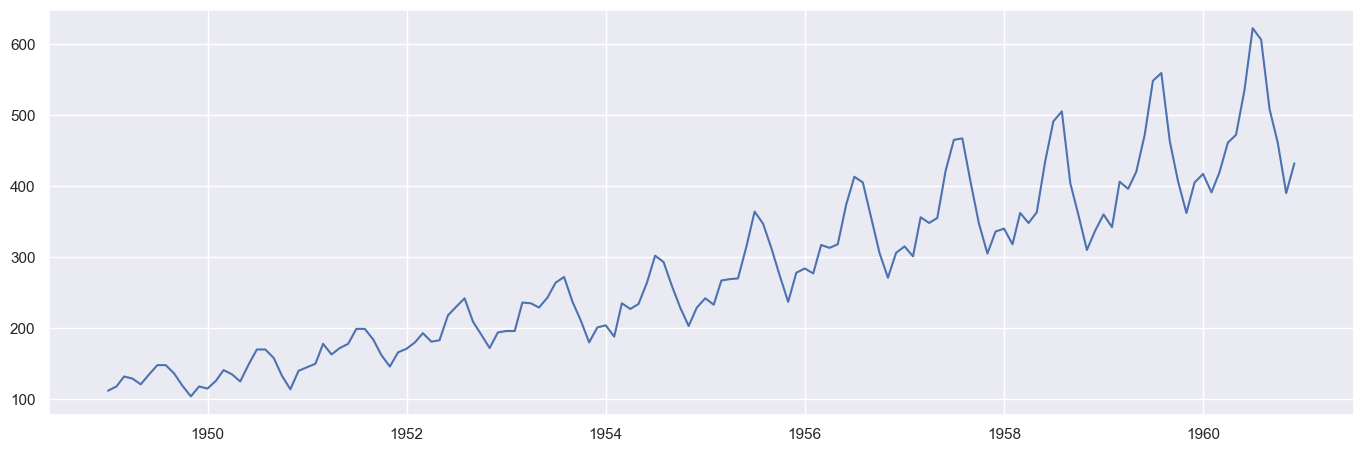

In [46]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df)

## 03. Time-series analysis: decomposition

In [48]:
# Decomposing the time series using an additive model
decomposing = sm.tsa.seasonal_decompose(df, model='additive')

In [49]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

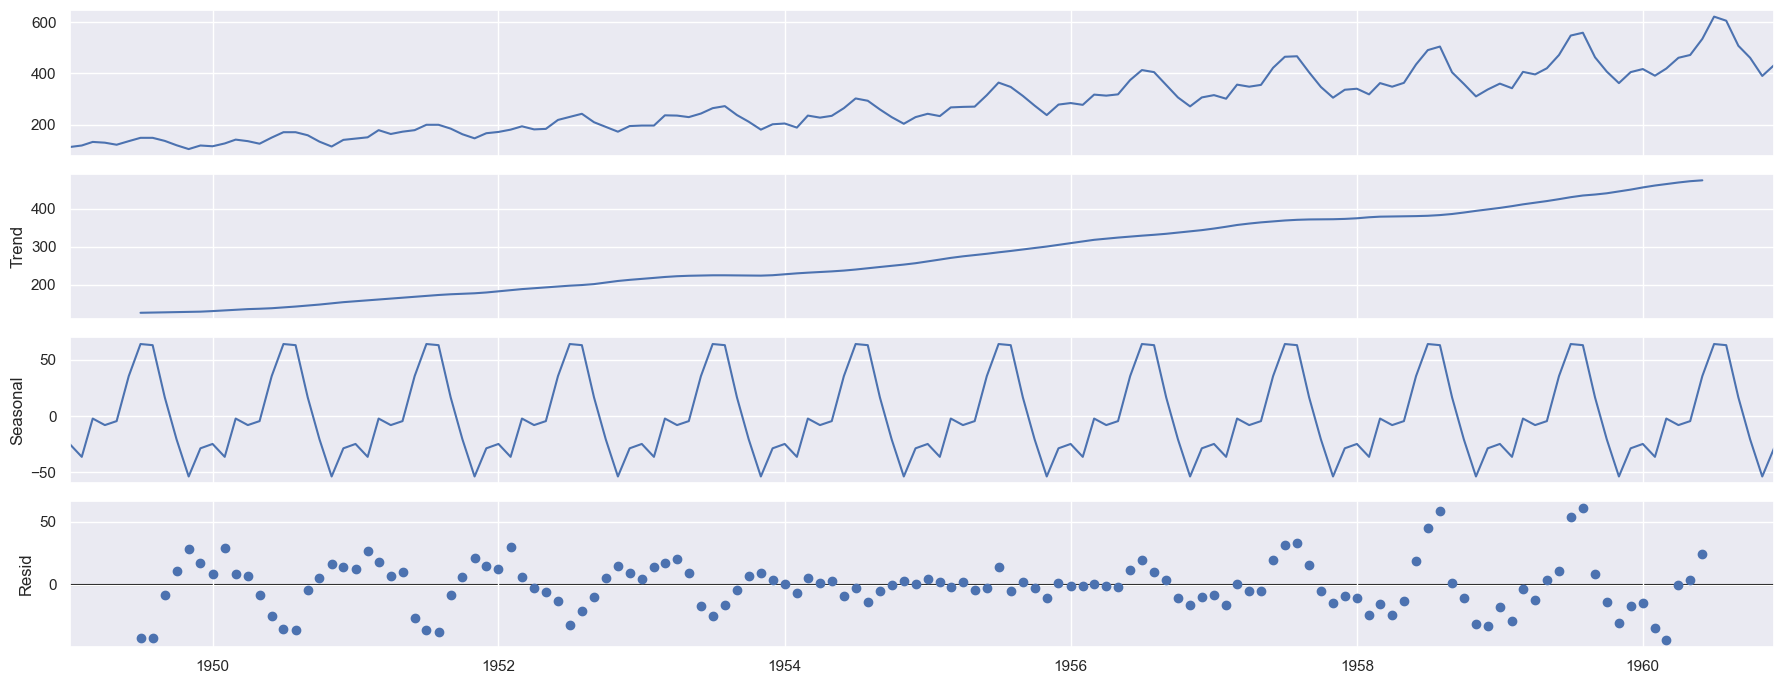

In [50]:
# Plotting the separate components
decomposing.plot()
plt.show()

#### Line 1 – the data including all the components.
#### Line 2 – Trend line has a gradual upward trend over the time.
#### Line 3 – Seasonal line represents seasonal fluctuation with a regular interval and evident annual seasonality.
#### Line 4 – On Noise or ‘residual’ chart we can see a number of up and down deviations except two-year period in 1954 – 1956 when the line almost flat.

## 04. Stationarity Test (Dickey-Fuller Test)

In [54]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df['number_passengers'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.815369
p-value                          0.991880
Number of Lags Used             13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### On our dataset the Test Statistics (0.815369) is larger than the Critical value (-2.884042). If we test the hypothesis, this result would mean that we cannot reject our null hypothesis. This is also evident that the data is non-stationary.

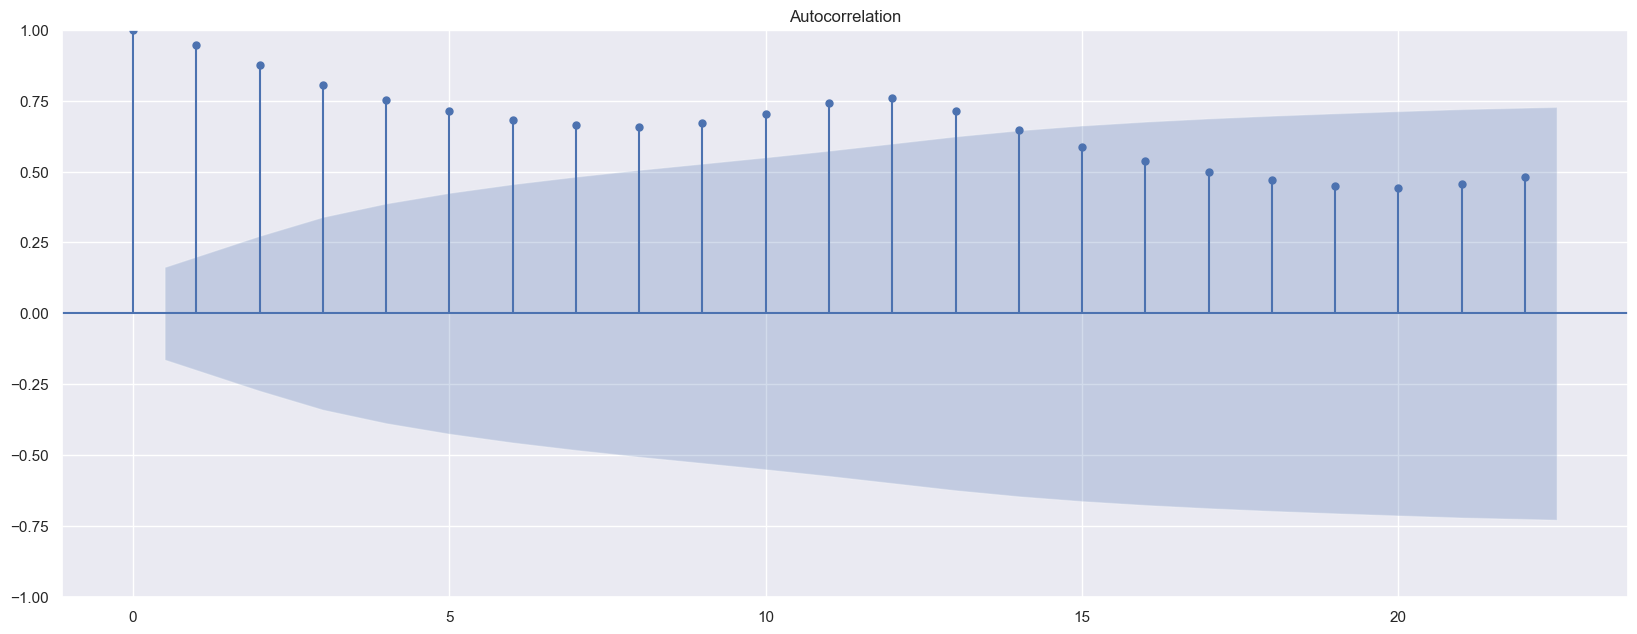

In [57]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()

#### Vertical lines represent lags in the time series. While the blue area represents the confidence interval.
#### On our chart there are many lags go above the confidence interval. This means that lags are significantly correlated with each other and the data is not stationary.
#### The Dickey-Fuller Test confirms non-stationary data as well. 

## 05. Stationarizing the data

In [60]:
data_diff = df - df.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [61]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [62]:
data_diff.head()

,number_passengers
datetime,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


In [63]:
data_diff.columns

Index(['number_passengers'], dtype='object')

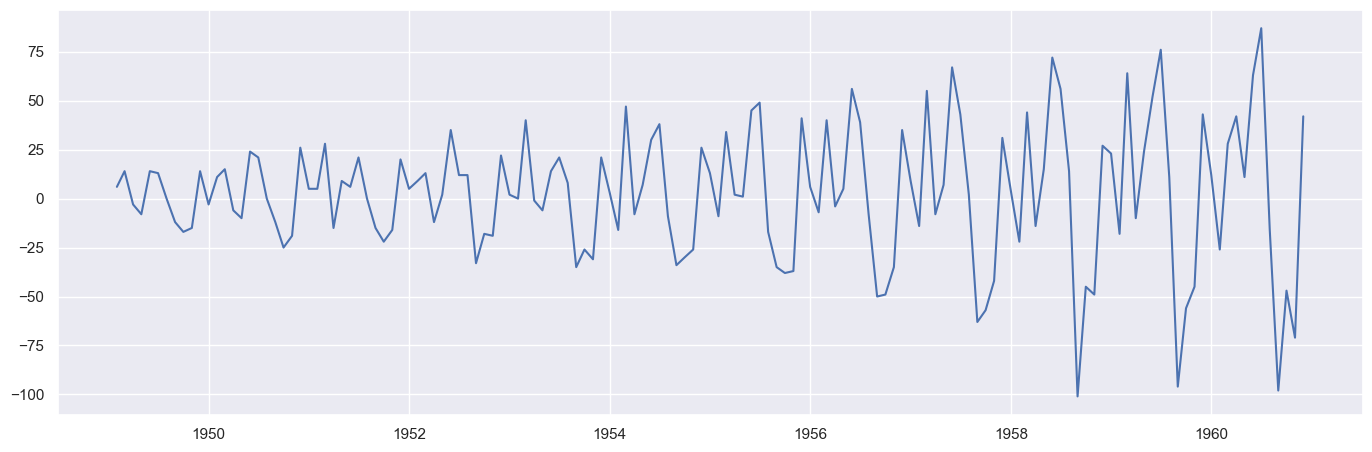

In [64]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [65]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.829267
p-value                          0.054213
Number of Lags Used             12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### On the differencing Time Series, Test Statistics (-2.829267) is larger than the Critical value (-3.481682). This can be interpreted as the following.
#### If we test the hypothesis, we cannot reject our null hypothesis
#### The unit root is present and the data is still non-stationary.

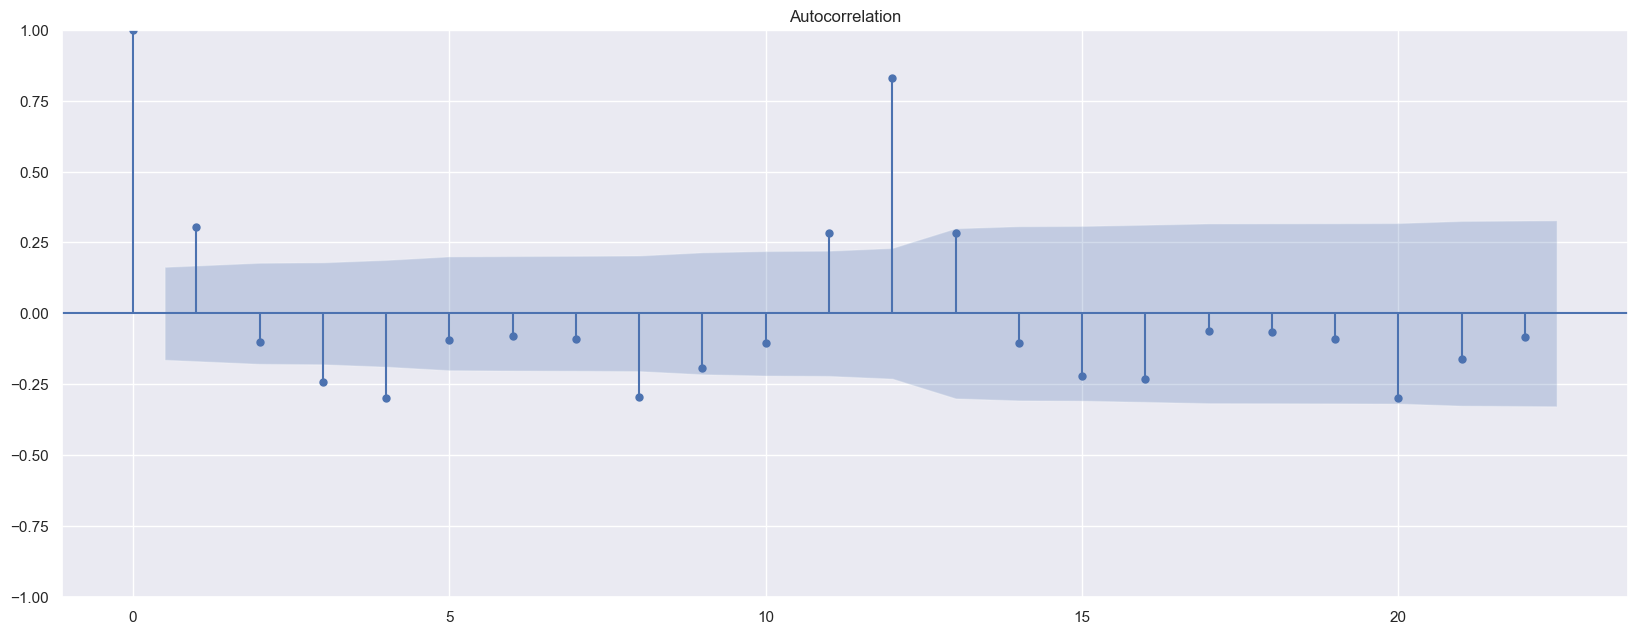

In [67]:
# Plotting the autocorrelation again
plot_acf(data_diff)
plt.show()

#### There are some improvements on the autocorrelation chart. More lags are lying within blue confidence area. However, the data is still not perfect and the Dickey-Fuller Test shows that the data is not stationary. 